## Comparing China's Economy

 *There has been plenty of talk on China’s rising economy coming out of the White House and the media. I decided to take a look at China’s economy over the last few decades by downloading data from the World Bank and Gapminder and compare it to countries with the top 5 largest economies.*

### Load Data

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# top 5 countries
China = ['China']
USA = ['United States']
top5 = ['United States','China', 'Japan', 'Germany', 'United Kingdom', 'India']

### Clean Data

In [12]:
gdp_files = [
'gdp_total_yearly_growth.csv',
'gdp_per_capita_yearly_growth.csv',
'gdppercapita_us_inflation_adjusted.csv',
'total_gni_ppp_current_international.csv',
'total_gdp_ppp_inflation_adjusted.csv',
'gnipercapita_atlasmethod_current_us.csv']

data = {}
for f in gdp_files:
    d = pd.read_csv("{}".format(f))
    data[f.replace(".csv", "")] = d

frame = []
keys = []
for k, v in data.items():
    con = v.loc[v['geo'].isin(top5)]
    con = con.set_index(['geo']).T
    con.index.name = 'year'
    frame.append(con)
    keys.append(k)
    data[k] = con
    
gdp = pd.concat(frame, keys = keys, sort = True)

In [13]:
debt_trade = ['trade_balance_us_not_inflation_adjusted.csv', 'trade_balance_percent_of_gdp.csv', 
              'total_reserves_percent_of_debt_to_foreigners.csv', 'merchandise_trade_percent_of_gdp.csv', 
              'imports_percent_of_gdp.csv','high_technology_exports_percent_of_manufactured_exports.csv',
              'exports_percent_of_gdp.csv','debt_to_foreigners_by_public_and_private_percent_of_gni.csv']

data1 = {}
for g in debt_trade:
    e = pd.read_csv("{}".format(g))
    data1[g.replace(".csv", "")] = e
    
frame1 = []
keys1 = []
for ke, va in data1.items():
    con1 = va.loc[va['geo'].isin(top5)]
    con1 = con1.set_index(['geo']).T
    frame1.append(con1)
    keys1.append(ke)
    data1[ke] = con1
    
debt_and_trade = pd.concat(frame1, keys = keys1, sort = True)

### GDP

The Gross Domestic Product or GDP measures the monetary value of the total amount of products made and service provided within a country. China has the second largest GDP (nominal) which is GDP measured at market exchange rates. However, measuring by exchage rates can be misleading since two countries produce the same product but one countries produces at a cheaper price. Since exchange rates can undervalue an econmy’s GDP, econmist use Purchasing Power Parity or PPP as an adjustment. PPP calculates the price of all the goods and service if it was sold in the United States this adjustment accounts for the cost of living between countries.

In [14]:
gdp.loc[keys[1]].iloc[189:][top5].mean()

geo
China             6.659333
United States     1.482973
Japan             1.118543
Germany           1.220360
United Kingdom    1.569500
India             4.783333
dtype: float64

In [16]:
gdp.loc[keys[1]].iloc[189:][top5].std()

geo
China             2.980278
United States     1.598503
Japan             2.007124
Germany           2.004942
United Kingdom    1.920053
India             2.013181
dtype: float64

On average, China's been growing around 7% yearly since 1990 with India at about 5%. The other countries have grown between 1-2% on average yearly. A graph would be a better way to visualize these numerical representation.

The graphs below shows the GDP of the top 5 economies in the world. China annual GDP growth has been tremendous that last two decades.


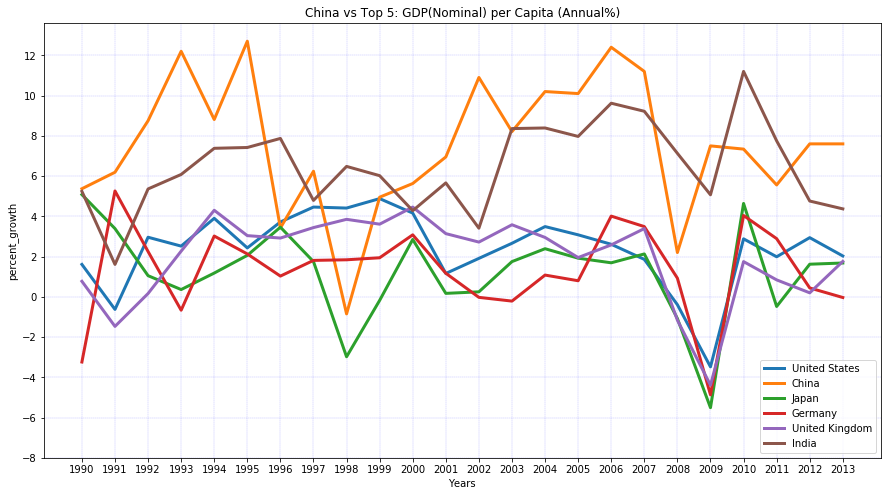

In [160]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (15,8))
gdp_year = gdp.loc[keys[0]].iloc[189:].index
gdp_total_yearly = gdp.loc[keys[0]].iloc[189:][top5]
ax.plot(gdp_year, gdp_total_yearly, linewidth = 3);
plt.xlabel('Years')
plt.ylabel('percent_growth')
plt.title('China vs Top 5: GDP(Nominal) per Capita (Annual%)')
plt.yticks(np.arange(-8, 14, step = 2))
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.legend(top5)
plt.show()

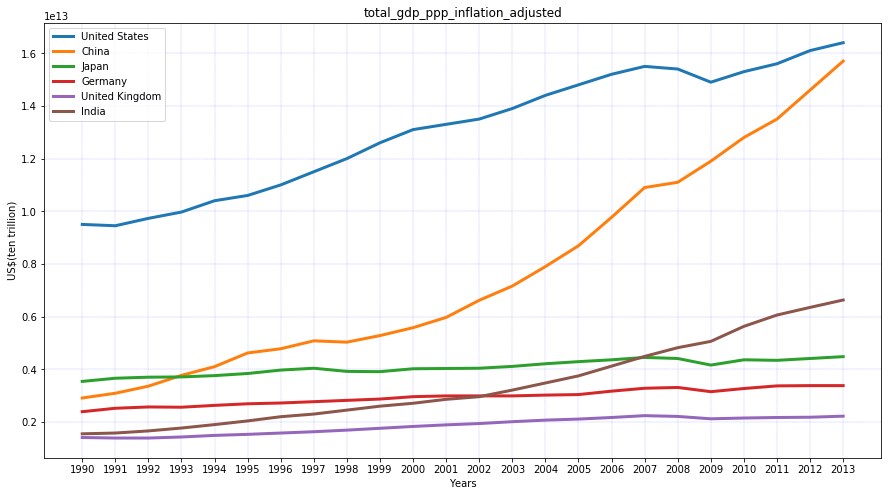

In [27]:
fig,ax = plt.subplots(figsize = (15,8))
gdp_year = gdp.loc[keys[4]].iloc[190:].index
gdp_total_yearly = gdp.loc[keys[4]].iloc[190:][top5]
ax.plot(gdp_year, gdp_total_yearly, linewidth = 3);
plt.xlabel('Years')
plt.ylabel('US$(ten trillion)')
plt.title(keys[4])
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.legend(top5)
plt.show()

**China’s total GDP(PPP) is large than the United States.**

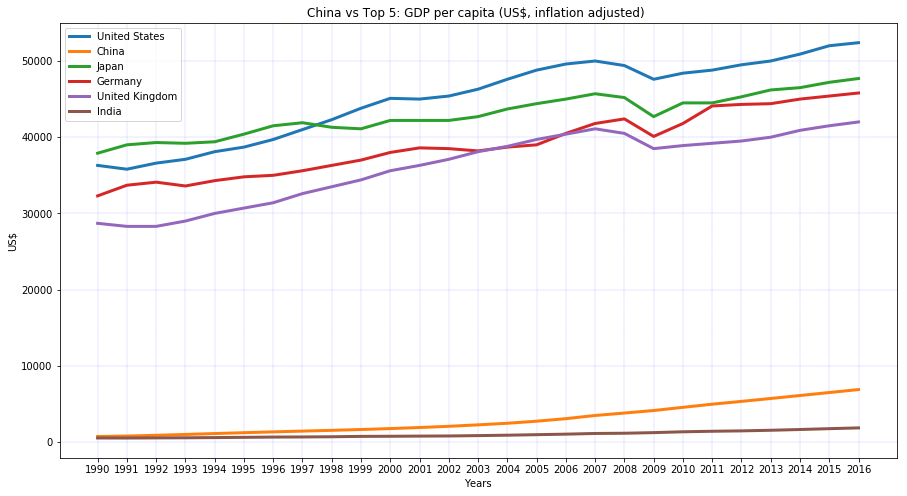

In [156]:
fig,ax = plt.subplots(figsize = (15,8))
gdp_year = gdp.loc[keys[2]].iloc[30:].index
gdp_total_yearly = gdp.loc[keys[2]].iloc[30:][top5]
ax.plot(gdp_year, gdp_total_yearly, linewidth = 3);
plt.xlabel('Years')
plt.ylabel('US$')
plt.title('China vs Top 5: GDP per capita (US$, inflation adjusted) ')
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.legend(top5)
plt.show()

The Total GDP(PPP) graph is only until 2013 and shows China closely second to the United States in largest economy. However, in 2014 the IMF reported China as the largest economy when adjusting GDP by PPP. 

It's worth noting that China's GDP per capita ppp is much smaller than the other western nations and indicates the economic disparity within the population. Yet, GDP per capita does not translate into comprehensive national power unless the country has a large enough population. China’s modest GDP per capita means that the country has room for growth.

Another economic parameter worth visualizing is trade balance. How much a country exports and imports:


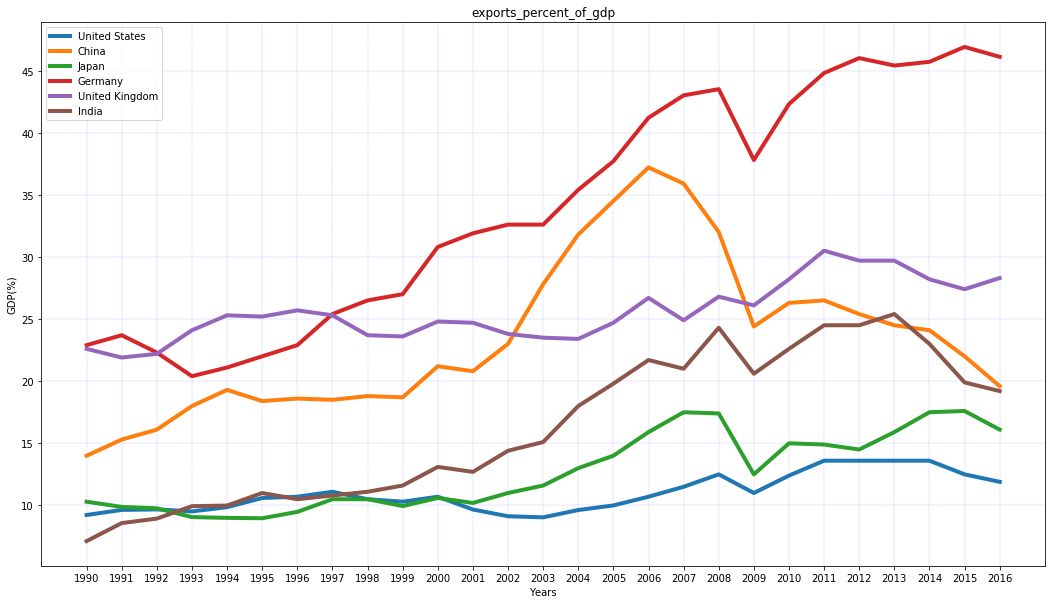

In [157]:
fig,ax = plt.subplots(figsize = (18,10))
db_year = debt_and_trade.loc[keys1[6]].iloc[30:].index
db = debt_and_trade.loc[keys1[6]].iloc[30:][top5]
ax.plot(db_year, db, linewidth = 4);
plt.legend(top5)
plt.xlabel('Years')
plt.ylabel('GDP(%)')
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.title(keys1[6])
plt.show()

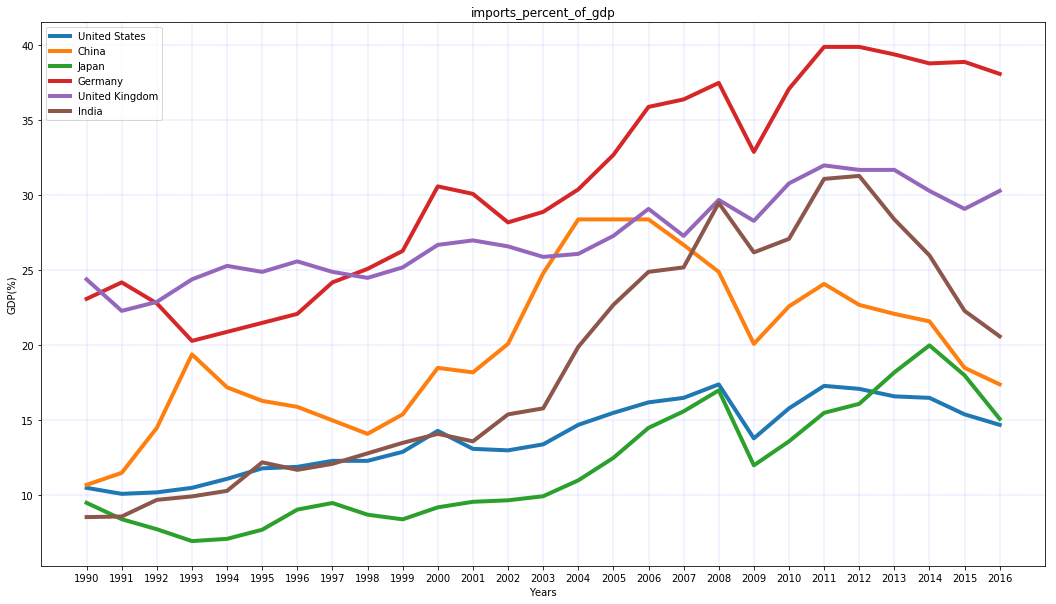

In [158]:
fig,ax = plt.subplots(figsize = (18,10))
db_year = debt_and_trade.loc[keys1[4]].iloc[30:].index
db = debt_and_trade.loc[keys1[4]].iloc[30:][top5]
ax.plot(db_year, db, linewidth = 4);
plt.legend(top5)
plt.xlabel('Years')
plt.ylabel('GDP(%)')
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.title(keys1[4])
plt.show()

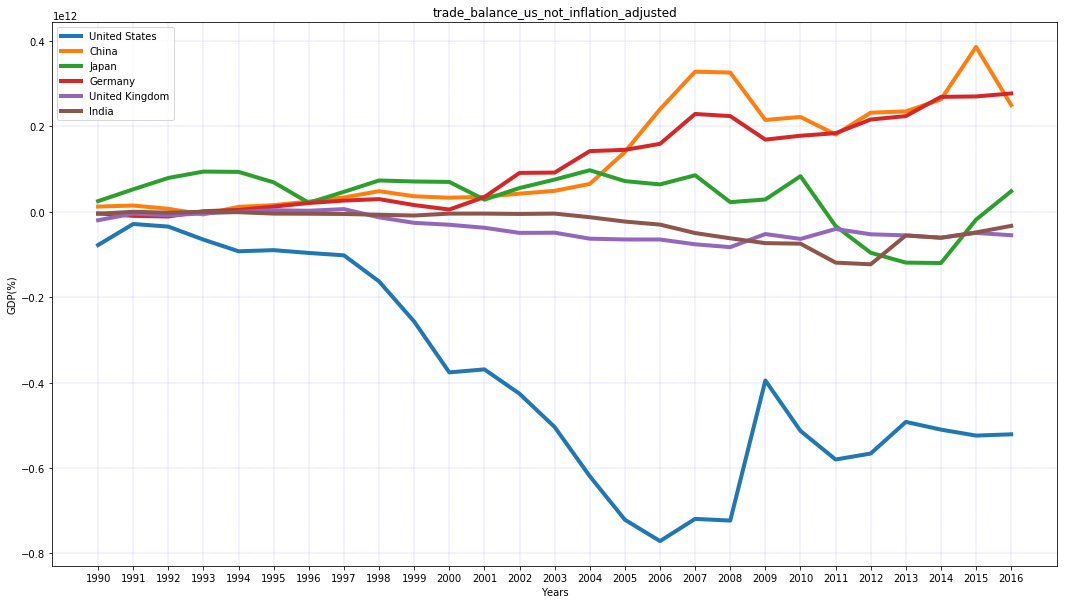

In [159]:
fig,ax = plt.subplots(figsize = (18,10))
db_year = debt_and_trade.loc[keys1[0]].iloc[30:].index
db = debt_and_trade.loc[keys1[0]].iloc[30:][top5]
ax.plot(db_year, db, linewidth = 4);
plt.legend(top5)
plt.xlabel('Years')
plt.ylabel('GDP(%)')
ax.grid(color='b', linestyle='dotted', linewidth=.25)
plt.title(keys1[0])
plt.show()

Although Germany has the highest import and export percentage of its GDP, China and the United States have a higher value in export and imports because of there large GDP. As of 2009, the World Bank reports China as the largest exporter and the second largest importer while U.S. is the largest importer and second largest exporter. Germany is the third largest importer and exporter.

The final graph shows trade deficit of China and the top 5 economies. The U.S, U.K and India had a trade deficit since the 1990's and it drastically increased for the U.S peaking at nearly 0.8 percent of GDP in 2006. Germany and China have seen a steady rise in trade surplus since 2000. 

## Reflection

*It's evident based on GDP and trade balance that the Chinese economy is large enough to garner world wide attention. China is nearly top three in all of the economic parameters measured in this report but what is really surprising is China's economic growth in just a few decades. After WWII, U.S reconstructed and form economic ties with Western Europe and Japan. Their rise was in part tied to the U.S but China and India have grown quite dramatically on their own. 
Although a large GDP adds to comprehensive national power for China, it does not warrant world leadership. There are to many factors that are not considered in this report to establish China as a new superpower but one thing is clear, China is heading towards the right direction.*